# Computer Vision and CNN

## Part 4 - Neural Network

### Importing libraries and data

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import cv2
import glob
import PIL

from sklearn.decomposition import PCA, IncrementalPCA

import keras
from keras.layers import Dense,Dropout, BatchNormalization, Activation, Flatten, Input
from keras.models import Sequential
from keras.activations import relu
from keras.optimizers import Adam,RMSprop,SGD
from keras.preprocessing.image import ImageDataGenerator
# from keras.utils import to_categorical

from keras.preprocessing import image

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pr

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
train_folder='drive/My Drive/Projects/Computer Vision/jpg'

### Analyzing and Visualizing data

In [ ]:
data_dir_train = pathlib.Path(train_folder)

folder_train = list(data_dir_train.glob('*'))
images_train = list(data_dir_train.glob('*/*.jpg')) #list of all images (full path)
print('Folder Structure:')
for f in folder_train:
    print(f)
print('\nNumber of images: ', len(images_train))

Folder Structure:
drive/My Drive/Projects/Computer Vision/jpg/Flower 17
drive/My Drive/Projects/Computer Vision/jpg/Flower 7
drive/My Drive/Projects/Computer Vision/jpg/Flower 8
drive/My Drive/Projects/Computer Vision/jpg/Flower 9
drive/My Drive/Projects/Computer Vision/jpg/Flower 6
drive/My Drive/Projects/Computer Vision/jpg/Flower 4
drive/My Drive/Projects/Computer Vision/jpg/Flower 10
drive/My Drive/Projects/Computer Vision/jpg/Flower 5
drive/My Drive/Projects/Computer Vision/jpg/Flower 16
drive/My Drive/Projects/Computer Vision/jpg/Flower 3
drive/My Drive/Projects/Computer Vision/jpg/Flower 14
drive/My Drive/Projects/Computer Vision/jpg/Flower 12
drive/My Drive/Projects/Computer Vision/jpg/Flower 1
drive/My Drive/Projects/Computer Vision/jpg/Flower 13
drive/My Drive/Projects/Computer Vision/jpg/Flower 2
drive/My Drive/Projects/Computer Vision/jpg/Flower 11
drive/My Drive/Projects/Computer Vision/jpg/Flower 15

Number of images:  1360


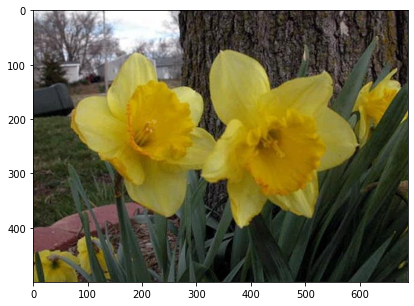

In [ ]:
filenames = glob.glob("drive/My Drive/Projects/Computer Vision/jpg/Flower 1/*.jpg")
filenames.sort()
images = [cv2.imread(img) for img in filenames]

plt.figure(figsize= (20,5));

plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB));

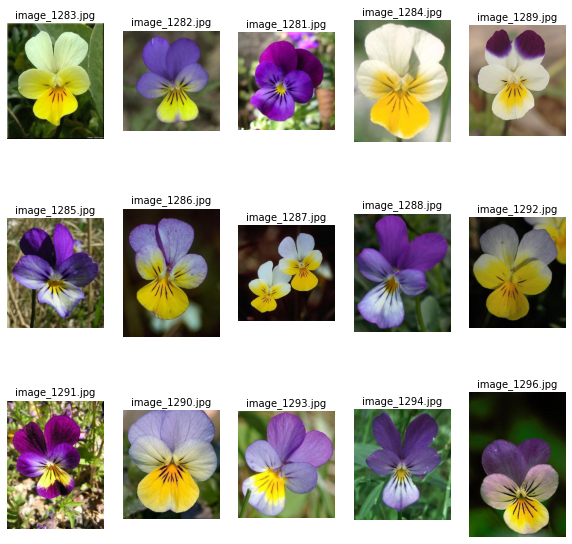

In [ ]:
fig = plt.figure(figsize=(10, 10))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.title(str(images_train[i]).split('/')[-1], fontsize=10) #get the file name and display as title
    plt.imshow(PIL.Image.open(images_train[i]))
    ax = plt.axis("off")

### Model Building

In [ ]:
image_size = 224
batch_size = 28

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20, # You can uncomment these parameters to make you generator rotate & flip the images to put the train model in stricter conditions.
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [ ]:
train_data = idg.flow_from_directory('drive/My Drive/Projects/Computer Vision/jpg',
                                                    target_size=(image_size, image_size),
                                                    subset='training',
                                                    class_mode='categorical',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=1
                                                )

Found 1088 images belonging to 17 classes.


In [ ]:
val_data = idg.flow_from_directory('drive/My Drive/Projects/Computer Vision/jpg',
                                                   target_size=(image_size, image_size),                                                   
                                                   subset='validation',
                                                   class_mode='categorical',
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   seed=1
                                                )

Found 272 images belonging to 17 classes.


In [ ]:
classes = train_data.class_indices
print(classes)
class_names = []
for c in classes:
    class_names.append(c)
print('The name of the classes are: ', class_names)

{'Flower 1': 0, 'Flower 10': 1, 'Flower 11': 2, 'Flower 12': 3, 'Flower 13': 4, 'Flower 14': 5, 'Flower 15': 6, 'Flower 16': 7, 'Flower 17': 8, 'Flower 2': 9, 'Flower 3': 10, 'Flower 4': 11, 'Flower 5': 12, 'Flower 6': 13, 'Flower 7': 14, 'Flower 8': 15, 'Flower 9': 16}
The name of the classes are:  ['Flower 1', 'Flower 10', 'Flower 11', 'Flower 12', 'Flower 13', 'Flower 14', 'Flower 15', 'Flower 16', 'Flower 17', 'Flower 2', 'Flower 3', 'Flower 4', 'Flower 5', 'Flower 6', 'Flower 7', 'Flower 8', 'Flower 9']


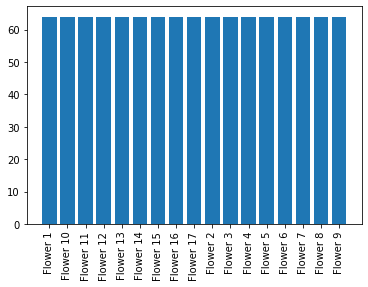

In [ ]:
unique, counts = np.unique(train_data.classes, return_counts=True)
dict1 = dict(zip(train_data.class_indices, counts))

keys = dict1.keys()
values = dict1.values()

plt.xticks(rotation='vertical')
bar = plt.bar(keys, values)

In [ ]:
model_ann = Sequential()

inputs = Input(shape=(224,224,3))
model_ann.add(tf.keras.layers.Flatten())

model_ann.add(Dense(548,activation = "relu"))
model_ann.add(Dropout(0.2))

# Normalization layer
model_ann.add(tf.keras.layers.BatchNormalization())

model_ann.add(Dense(224,activation = "relu"))
model_ann.add(Dropout(0.2))

# Normalization layer
model_ann.add(tf.keras.layers.BatchNormalization())

model_ann.add(Dense(112,activation = "relu"))
model_ann.add(Dropout(0.2))

# Normalization layer
model_ann.add(tf.keras.layers.BatchNormalization())
model_ann.add(Dense(34,activation = "relu"))
model_ann.add(Dropout(0.2))


model_ann.add(Dense(17,activation='softmax'))

In [ ]:
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# model_ann.summary()

In [ ]:
history = model_ann.fit(train_data,
          epochs=20,                         
          steps_per_epoch= 1088//batch_size,  # Number of train images // batch_size
          validation_data=val_data,
          validation_steps = 272//batch_size
)

Epoch 1/20
38/38 [==============================] - 49s 731ms/step - loss: 3.2495 - accuracy: 0.0621 - val_loss: 4.2938 - val_accuracy: 0.0437
Epoch 2/20
38/38 [==============================] - 27s 706ms/step - loss: 2.8786 - accuracy: 0.1008 - val_loss: 3.1836 - val_accuracy: 0.1548
Epoch 3/20
38/38 [==============================] - 27s 702ms/step - loss: 2.6911 - accuracy: 0.1658 - val_loss: 2.7080 - val_accuracy: 0.2460
Epoch 4/20
38/38 [==============================] - 27s 705ms/step - loss: 2.5782 - accuracy: 0.1757 - val_loss: 2.5056 - val_accuracy: 0.2500
Epoch 5/20
38/38 [==============================] - 27s 702ms/step - loss: 2.5214 - accuracy: 0.1832 - val_loss: 2.1738 - val_accuracy: 0.2619
Epoch 6/20
38/38 [==============================] - 27s 703ms/step - loss: 2.3922 - accuracy: 0.1995 - val_loss: 2.1342 - val_accuracy: 0.2460
Epoch 7/20
38/38 [==============================] - 27s 705ms/step - loss: 2.3351 - accuracy: 0.2208 - val_loss: 2.0768 - val_accuracy: 0.2619

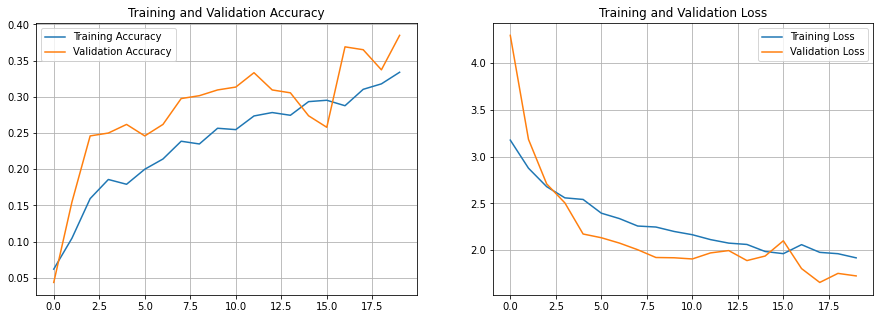

In [ ]:
epochs = 20

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()

Max accuracy achieved after 20 epochs in Neural network is 38.49%